In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
import math
import seaborn as sns
figsize = (6,4)


import os

import chaospy as cp
import pandas as pd

import itertools
import scipy.stats as ss  

from matplotlib import pyplot as plt,cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel,WhiteKernel)

In [2]:
pltlinestyles = [ (0, (1, 5)),(0, (3, 5, 1, 5)),(0, (5, 5)),(0, ()), (0, (3, 1, 1, 1, 1, 1)), 
        (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (3, 10, 1, 10, 1, 10)),(0, (1, 10)), 
        (0, (5, 1)),  (0, (3, 1, 1, 1)),(0, (3, 5, 1, 5, 1, 5)),  (0, (1, 1))  ]*10

pltmarkers   = ['o','v','s','d','+','*']
ordinal      = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
pltcolors    = plt.rcParams['axes.prop_cycle'].by_key()['color']
figsize      = (4*1.5,3*1.5)
pltlinewidth = 1.0
return_period= [1,5,10]
prob_fails   = [1/(p *365.25*24*3600/1000) for p in return_period]
pf1year, pf5year, pf10year = prob_fails
n_mcs = 1.0/np.array(prob_fails)*100
print(n_mcs)


[ 3155760. 15778800. 31557600.]


In [3]:
MODEL_NAME      = 'bench4'
WORKING_DIR     = os.getcwd()
MODEL_DIR       = os.path.join('/Users/jinsongliu/BoxSync/MUSELab/museuq/examples', MODEL_NAME)
MODEL_DIR_FIGURE= os.path.join(MODEL_DIR,r'Figures')
MODEL_DIR_DATA  = os.path.join('/Users/jinsongliu/External/MUSE_UQ_DATA',MODEL_NAME,r'Data') 

print('WORKING_DIR: {}'.format(WORKING_DIR))
print('+-- MODEL: {}'.format(MODEL_DIR))
print('|   +-- {:<6s}: {}'.format('FIGURE',MODEL_DIR_FIGURE))
print('|   +-- {:<6s}: {}'.format('DATA',MODEL_DIR_DATA))


WORKING_DIR: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/JupyterNotebook
+-- MODEL: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/bench4
|   +-- FIGURE: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/bench4/Figures
|   +-- DATA  : /Users/jinsongliu/External/MUSE_UQ_DATA/bench4/Data


## Bench 4

<IPython.core.display.Javascript object>


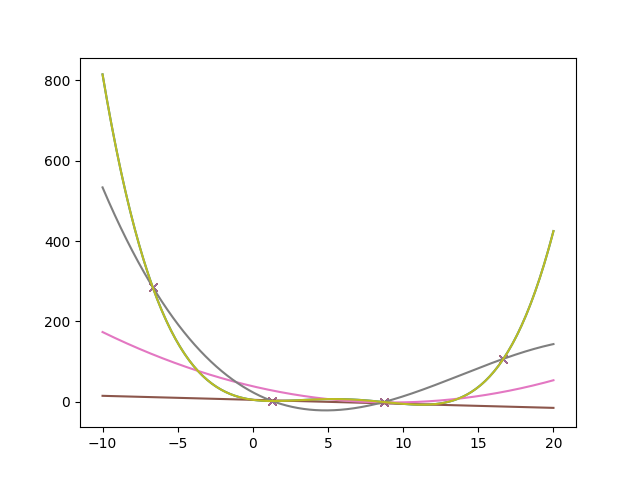

In [4]:
x = np.linspace(-10,20,100)
y = 5 + -5*x + 2.5*x**2 -0.36*x**3 + 0.015*x**4

fig = plt.figure()
plt.plot(x,y)


In [8]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem4.npy'))
print(data_set)
train_u = data_set[0]
train_x = data_set[1]
train_w = data_set[2]
# print(np.polynomial.hermite_e.hermegauss(4))
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem4_y.npy'))
train_y = data_set
# fig = plt.figure()
plt.plot(train_x,train_y,'x')
# print(mcs_x.shape)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_plot_x.npy'))
plot_x = np.squeeze(data_set)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem2_PCE_GLK_plot_y.npy'))
plot_y = np.squeeze(data_set)

plt.plot(plot_x,plot_y)


[[-2.33441422 -0.74196378  0.74196378  2.33441422]
 [-6.67207109  1.29018108  8.70981892 16.67207109]
 [ 0.11499371  1.13832042  1.13832042  0.11499371]]


In [9]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_plot_x.npy'))
plot_x = np.squeeze(data_set)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem3_PCE_GLK_plot_y.npy'))
plot_y = np.squeeze(data_set)

plt.plot(plot_x,plot_y)


In [10]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_plot_x.npy'))
plot_x = np.squeeze(data_set)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem4_PCE_GLK_plot_y.npy'))
plot_y = np.squeeze(data_set)

plt.plot(plot_x,plot_y)

In [11]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_plot_x.npy'))
plot_x = np.squeeze(data_set)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem5_PCE_GLK_plot_y.npy'))
plot_y = np.squeeze(data_set)

plt.plot(plot_x,plot_y)

## Ishigami


In [37]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McsE6.npy'))
mcs_x = data_set
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McsE6_y.npy'))
mcs_y = data_set

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Leg17_y_pred.npy'))
pce_leg17_y = data_set
sns.distplot(mcs_y,bins=100)
sns.distplot(pce_leg17_y,bins=100)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jinsongliu/External/MUSE_UQ_DATA/bench4/Data/DoE_Quad_Leg17_y_pred.npy'

In [8]:
from scipy.stats.mstats import mquantiles
a = np.array([6., 47., 49., 15., 42., 41., 7., 39., 43., 40., 36.])
mquantiles(a, prob=0.5)

array([40.])

In [18]:
from scipy.stats import moment
a = moment([1, 2, 3, 4, 5], moment=[1,2])

a.size

2

In [22]:
random = [5, 9, 'cat']

# converting list to iterator
randomIterator = iter(random)
a = next(randomIterator)
print(a)

5


<IPython.core.display.Javascript object>


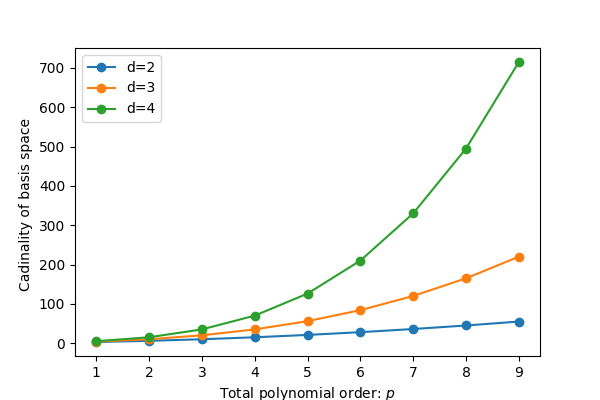

<IPython.core.display.Javascript object>


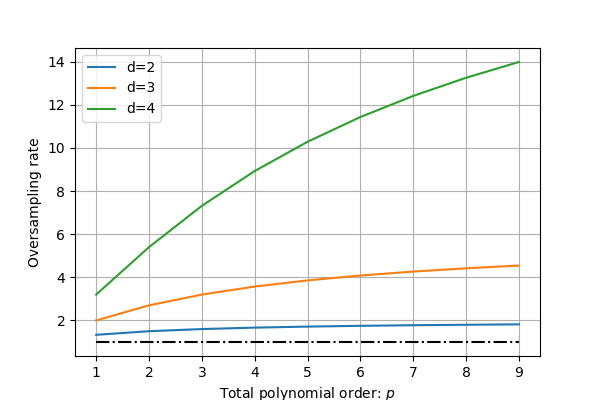

In [197]:
p = np.arange(1,10, dtype=np.float64)
d = np.arange(2,5, dtype=np.float64)
pp, dd = np.meshgrid(p,d)
P = np.zeros((len(d), len(p)))
r = np.zeros(pp.shape, dtype=np.float64)
for i in range(len(d)):
    for j in range(len(p)):
        ipp = pp[i,j]
        idd = dd[i,j]
        P[i,j] = math.factorial(idd+ipp)/ (math.factorial(idd) * math.factorial(ipp))
        r[i,j] = (ipp+1)**idd / P[i,j]

        
        
fig = plt.figure(figsize=figsize)

for i, idd in enumerate(d):
    plt.plot(p, P[i,:],marker='o',label='d={:d}'.format(int(idd)))
    plt.legend()
plt.xlabel('Total polynomial order: $p$')    
plt.ylabel('Cadinality of basis space ')
    
    
fig = plt.figure(figsize=figsize)
plt.plot(p, p/p,'k-.')
for i, idd in enumerate(d):
    plt.plot(p, r[i,:],label='d={:d}'.format(int(idd)))
# sc  = plt.scatter(dd, pp, c=r)
# plt.colorbar(sc)
plt.ylabel('Oversampling rate')
plt.xlabel('Total polynomial order: $p$')
# plt.title('Ratio= $(p+1)^d/P$')
# plt.xlim(0.5,10.5)
# plt.ylim(0.5,30.5)
plt.legend()
plt.grid()


In [6]:
c = np.array([[ 1, 2, 3],
              [-1, 1, 4]])
d = LA.norm(c, axis=0)
print(d.shape)

(3,)


In [12]:
a = np.polynomial.hermite.Hermite.basis(4)
print(type(a))

<class 'numpy.polynomial.hermite.Hermite'>


[[ 0.08680988 -0.44326123 -0.15096482 ... -0.70641422  0.6998739
  -0.92538496]
 [-0.08573241  0.82033865 -0.22180813 ...  0.68121294  0.76240948
   0.15390048]]


<IPython.core.display.Javascript object>


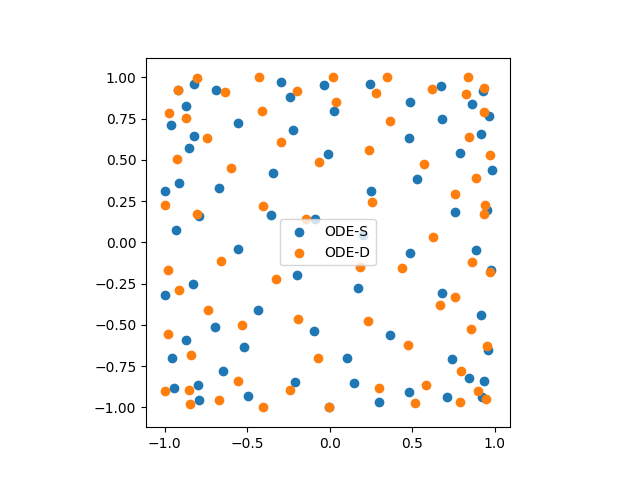

In [188]:
mcs_x   = np.load('Uniform2D_MCSR_x_72.npy')
odeS_x  = np.load('Uniform2D_ODES_x_72.npy')
odeD_x  = np.load('Uniform2D_ODED_x_72.npy')

print(mcs_x)
fig = plt.figure()
# plt.scatter(mcs_x[0],mcs_x[1], alpha=0.5, s=10,label='MCS')
plt.scatter(odeS_x[0],odeS_x[1], label='ODE-S')
plt.scatter(odeD_x[0],odeD_x[1], label='ODE-D')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')


In [63]:
x_p = np.load('Uniform_quasi_opt_x_p.npy')
X_p = np.load('Uniform_quasi_opt_X1_p.npy')
indices_p = np.load('Uniform_quasi_opt_indices_p.npy')

x1 = np.load('Uniform_quasi_opt_x_61.npy')
X1 = np.load('Uniform_quasi_opt_X1_61.npy')
indices1 = np.load('Uniform_quasi_opt_indices_61.npy')

x2 = np.load('Uniform_quasi_opt_x_100.npy')
X2 = np.load('Uniform_quasi_opt_X1_100.npy')
indices2 = np.load('Uniform_quasi_opt_indices_100.npy')

x3 = np.load('Uniform_quasi_opt_x.npy')
X3 = np.load('Uniform_quasi_opt_X1.npy')
indices3 = np.load('Uniform_quasi_opt_indices.npy')

In [66]:
cdf_asym_x = np.linspace(-1,1,100)
cdf_asym_F = 2/np.pi * np.arcsin(np.sqrt((cdf_asym_x + 1 ) / 2))
cdf_norm_F = norm.cdf(cdf_asym_x)
ecdf_x_p = ECDF(x_p)
ecdf_x1 = ECDF(x1)
ecdf_x2 = ECDF(x2)
ecdf_x3 = ECDF(x3)
print(dir(ecdf_x))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'n', 'side', 'x', 'y']


<IPython.core.display.Javascript object>


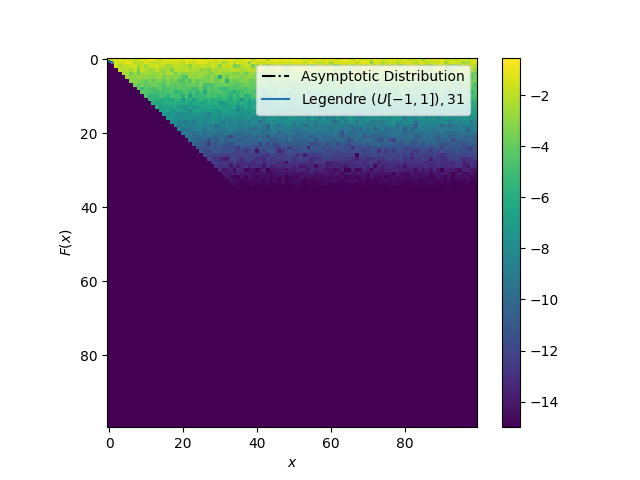

In [70]:
fig = plt.figure()
plt.plot(cdf_asym_x, cdf_asym_F, 'k-.',label='Asymptotic Distribution')
# plt.plot(cdf_asym_x, cdf_norm_F, 'r-.',label='Normal Distribution')
plt.plot(ecdf_x_p.x, ecdf_x_p.y, label='Legendre $(U[-1,1]),31$')
# plt.plot(ecdf_x1.x, ecdf_x1.y, label='Legendre $(U[-1,1]),61$')
# plt.plot(ecdf_x2.x, ecdf_x2.y, label='Legendre $(U[-1,1]),100$')
# plt.plot(ecdf_x3.x, ecdf_x3.y, label='Legendre $(U[-1,1]),100$')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.legend()


In [71]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as pt

In [72]:
n = 100
A0 = np.random.randn(n, n)
U0, sigma0, VT0 = la.svd(A0)
print(la.norm((U0*sigma0).dot(VT0) - A0))

sigma = np.exp(-np.arange(n))

A = (U0 * sigma).dot(VT0)

2.1146388303022047e-13


In [87]:
Q, R, perm = la.qr(A, pivoting=True)
print(perm)
print(np.round(A[:5,:5],4))

[52 36 90 24 97  5 92 99  3 11 87 35 76 74 13 56 79 91 17 48 85  0 44 47
 12 33 10 65 22 63 64 58 88 23 27 62 37 69 89 80  1 38 53 54 39 84 83 82
 78 34 43  4 77 72 45  8 57 46 30  7 49 66 51 21 86 93 20 70 94 14 29 98
 28 31  6 95 50  2  9 96 71 55 41 68 60 32 67 18 59 25 42 61 19 15 73 75
 81 40 16 26]
[[-0.0052  0.0003 -0.0001 -0.0012 -0.0028]
 [-0.0691 -0.0369 -0.0179  0.0044 -0.042 ]
 [ 0.0002  0.0035  0.0021 -0.0012 -0.0002]
 [ 0.0484  0.0256  0.0148 -0.0026  0.0297]
 [ 0.0072  0.0078 -0.0039 -0.0022  0.0028]]


In [91]:
la.norm(A[:, perm] - Q.dot(R), 2)
print(np.round(A[:5,perm[:5]],4))

[[-0.0006 -0.0057 -0.0006  0.0047 -0.0006]
 [-0.0951  0.0098 -0.009   0.0412  0.0122]
 [ 0.0078 -0.0074 -0.0049 -0.0007 -0.0049]
 [ 0.068  -0.0062  0.0053 -0.0283 -0.0092]
 [ 0.0124 -0.0096  0.0002 -0.0071 -0.0049]]


In [75]:
la.norm(Q.dot(Q.T) - np.eye(n))


7.883465961139795e-15

<IPython.core.display.Javascript object>


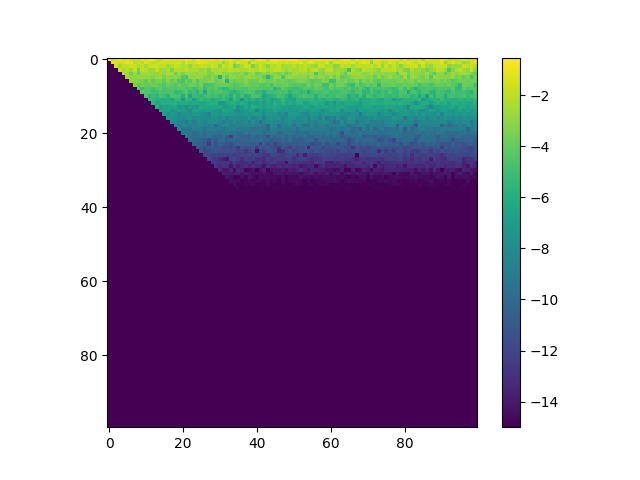

In [83]:
plt.figure()
pt.imshow(np.log10(1e-15+np.abs(R)))
pt.colorbar()

<IPython.core.display.Javascript object>


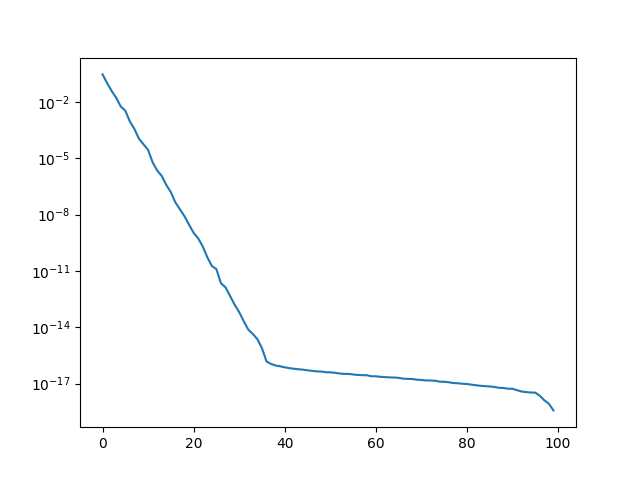

In [82]:
plt.figure()
pt.semilogy(np.abs(np.diag(R)))
